## We start off by importing the packages we need to run the Machine Learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels
import sklearn
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from IPython.display import Image
from sklearn.tree import export_graphviz
%matplotlib inline
import plotly
import plotly.express as px

## The two links below allow us to import the data.

In [2]:
link = 'https://drive.google.com/file/d/1tT0lNiDHwGQPLa3N0zSdhZcJZaa5aqF3/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]

In [3]:
path

'https://drive.google.com/uc?export=download&id=1tT0lNiDHwGQPLa3N0zSdhZcJZaa5aqF3'

## ...now we import the .csv file (kaggle_listings.csv)....and print the column names and first five lines...and assign it the name of 'listings_df'

In [4]:
listings_df = pd.read_csv(path)
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

In [5]:
listings_df.shape

(3818, 92)

## There are 3818 entries...and 92 columns of data

In [6]:
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

## ...now we're going to cut off some of those columns to what we need...and name it 'df'...

In [7]:
# select a set of columns
df = listings_df[["host_response_rate", "host_acceptance_rate", "host_is_superhost",
               "host_listings_count", "zipcode", "property_type","room_type", "accommodates", "bathrooms", "bedrooms", 
               "beds", "price", "number_of_reviews", "review_scores_rating", "cancellation_policy", 
               "reviews_per_month"]]

In [9]:
df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
0,96%,100%,f,3.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$85.00,207,95.0,moderate,4.07
1,98%,100%,t,6.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$150.00,43,96.0,strict,1.48
2,67%,100%,f,2.0,98119,House,Entire home/apt,11,4.5,5.0,7.0,$975.00,20,97.0,strict,1.15
3,NaN,NaN,f,1.0,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,$100.00,0,NaN,flexible,NaN
4,100%,NaN,f,2.0,98119,House,Entire home/apt,6,2.0,3.0,3.0,$450.00,38,92.0,strict,0.89


## ...now we see some of the cells that were blank in the .csv have a value of NaN...or "Not a Number"...that causes a problem...so lets look at it...

## ...We also have different types of data in the columns..."%"..."$"...words...and "#.0"...

In [10]:
# % of NaN values
( 1 - df.count() / len(df) ) * 100

host_response_rate      13.698271
host_acceptance_rate    20.246202
host_is_superhost        0.052383
host_listings_count      0.052383
zipcode                  0.183342
property_type            0.026192
room_type                0.000000
accommodates             0.000000
bathrooms                0.419068
bedrooms                 0.157150
beds                     0.026192
price                    0.000000
number_of_reviews        0.000000
review_scores_rating    16.946045
cancellation_policy      0.000000
reviews_per_month       16.422211
dtype: float64

## ...remember we cut down the columns to just a few...so still 3818 rows and just 16 columns...

In [11]:
df.shape

(3818, 16)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_response_rate    3295 non-null   object 
 1   host_acceptance_rate  3045 non-null   object 
 2   host_is_superhost     3816 non-null   object 
 3   host_listings_count   3816 non-null   float64
 4   zipcode               3811 non-null   object 
 5   property_type         3817 non-null   object 
 6   room_type             3818 non-null   object 
 7   accommodates          3818 non-null   int64  
 8   bathrooms             3802 non-null   float64
 9   bedrooms              3812 non-null   float64
 10  beds                  3817 non-null   float64
 11  price                 3818 non-null   object 
 12  number_of_reviews     3818 non-null   int64  
 13  review_scores_rating  3171 non-null   float64
 14  cancellation_policy   3818 non-null   object 
 15  reviews_per_month    

### ...more info on the columns...if there is just a #...then it's an int64...if it has a #.0 then its a float64...if it has multiple types of data then its an object...

## But we need to get rid of the NaN's to do Machine Learning...so we're going to create a new Data Frame called df2...

In [13]:
# drop NaN rows
df2=df.dropna(axis=0)

## There are lots of strategies for dealing with "NaN"...average, mean, mode...or just get rid of it...each has its own Pro's and Con's...but should be a deliberate decision...

In [ ]:
# % of rows droppped
(len(df)-len(df2))/len(df)*100

30.434782608695656

In [ ]:
df2.shape

(2656, 16)

## The new Data Frame has just 2656 rows with the same 16 columns...now we need to keep cleaning up the data and get the data as uniform as possible...

## First we'll convert some data to a string...then get rid of the extra characters ("%", "$", etc...)...and save them as a float.

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

df2['host_response_rate'] = df2['host_response_rate'].astype(str)
df2['host_acceptance_rate'] = df2['host_acceptance_rate'].astype(str)
df2['price'] = df2['price'].astype(str)

In [ ]:
# clean data
pd.options.mode.chained_assignment = None  # default='warn'
df2['host_acceptance_rate'] = df2['host_acceptance_rate'].str.replace("%", "").astype("float")
df2['price'] = df2['price'].str.replace("[$, ]", "").astype("float")
df2['host_response_rate'] = df2['host_response_rate'].str.replace("%", "").astype("float")


## ...and then we're going to change the Superhost information...right now it's either "t" or "f"...we want a 1 or 0...

In [ ]:
df2['superhost']=np.where(df2['host_is_superhost']=='t',1,0)
del df2['host_is_superhost']

In [ ]:
df2.head()

,host_response_rate,host_acceptance_rate,host_listings_count,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month,superhost
0,96.0,100.0,3.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,85.0,207,95.0,moderate,4.07,0
1,98.0,100.0,6.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,150.0,43,96.0,strict,1.48,1
2,67.0,100.0,2.0,98119,House,Entire home/apt,11,4.5,5.0,7.0,975.0,20,97.0,strict,1.15,0
6,100.0,100.0,1.0,98119,House,Private room,2,1.0,1.0,1.0,80.0,58,99.0,moderate,2.46,1
7,100.0,100.0,5.0,98119,Cabin,Private room,2,1.0,1.0,1.0,60.0,173,97.0,strict,4.73,1


## A ton of ML is just getting the data ready to do the ML...cleaning the data...

In [ ]:
# select non-numeric variables and create dummies
non_num_vars = df2.select_dtypes(include=['object']).columns
df2[non_num_vars].head()

,zipcode,property_type,room_type,cancellation_policy
0,98119,Apartment,Entire home/apt,moderate
1,98119,Apartment,Entire home/apt,strict
2,98119,House,Entire home/apt,strict
6,98119,House,Private room,moderate
7,98119,Cabin,Private room,strict


## ...Now we need to address the object data...the words...we can't use the above to do ML...so we're going to change them to binary...a 1 or a 0 in a new column if that applies to it...and we're going to add a lot more columns...

In [ ]:
dummy_vars = pd.get_dummies(df2[non_num_vars])

In [ ]:
dummy_vars.head()

,zipcode_98101,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98121,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98178,zipcode_98199,zipcode_99\n98122,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
# drop non-numeric variables from df2 and add the dummies
df3=df2.drop(non_num_vars,axis=1)
df3 = pd.merge(df3,dummy_vars, left_index=True, right_index=True)
df3.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,reviews_per_month,superhost,zipcode_98101,zipcode_98102,zipcode_98103,zipcode_98104,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98121,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98134,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98177,zipcode_98178,zipcode_98199,zipcode_99\n98122,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Chalet,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,96.0,100.0,3.0,4,1.0,1.0,1.0,85.0,207,95.0,4.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,98.0,100.0,6.0,4,1.0,1.0,1.0,150.0,43,96.0,1.48,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,67.0,100.0,2.0,11,4.5,5.0,7.0,975.0,20,97.0,1.15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
6,100.0,100.0,1.0,2,1.0,1.0,1.0,80.0,58,99.0,2.46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
7,100.0,100.0,5.0,2,1.0,1.0,1.0,60.0,173,97.0,4.73,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [ ]:
df3.shape

(2656, 62)

## We finish off with 2656 rows and 62 columns...assigned to the variable 'df3'...

## summary stats...this is the "cleaned" list 

In [ ]:
px.histogram(df3, x="price", title="Histogram of Listing Prices", labels={'price':"Price in $"})

In [ ]:
px.scatter(df3, x="price", y="bedrooms", title="Price vs. Bedrooms")

In [ ]:
px.scatter(df3, x="number_of_reviews", y="price", title="Number of Reviews vs. Price")


In [ ]:
df3['bedrooms'].value_counts()

1.0    1696
2.0     446
0.0     277
3.0     183
4.0      35
5.0      14
6.0       4
7.0       1
Name: bedrooms, dtype: int64

In [ ]:
price_bedrooms_df = df3.groupby(['price','bedrooms']).size().reset_index()
price_bedrooms_df

,price,bedrooms,0
0,22.0,1.0,1
1,25.0,1.0,5
2,27.0,1.0,1
3,28.0,1.0,3
4,29.0,1.0,7
...,...,...,...
449,749.0,3.0,1
450,750.0,6.0,1
451,775.0,4.0,1
452,975.0,5.0,1


Text(0.5, 0, 'Listing price in $')

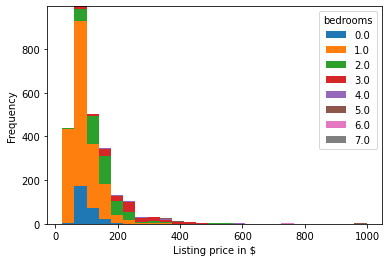

In [ ]:
df3.pivot(columns = 'bedrooms',values = 'price').plot.hist(stacked = True,bins=25)
plt.xlabel('Listing price in $')

Text(0.5, 0, 'Listing price in $')

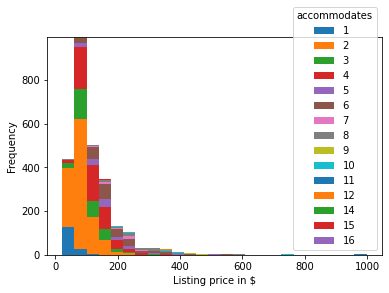

In [ ]:
df3.pivot(columns = 'accommodates',values = 'price').plot.hist(stacked = True,bins=25)
plt.xlabel('Listing price in $')

## We'll use the previous "df2" to break it out by room type...

Text(0.5, 0, 'Listing price in $')

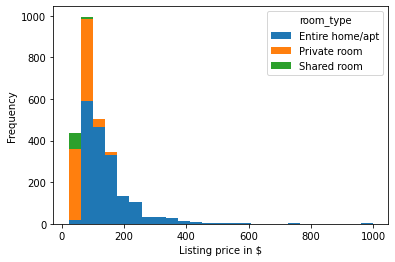

In [ ]:
df2.pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=25)
plt.xlabel('Listing price in $')

In [ ]:
cols = ['number_of_reviews','host_acceptance_rate','host_listings_count','accommodates',
       'bathrooms','bedrooms','beds','price']

## ...now...we will look at Pearson product-moment correlation coefficients...correlations between the different variables...Price and the number of people a property accomodates...

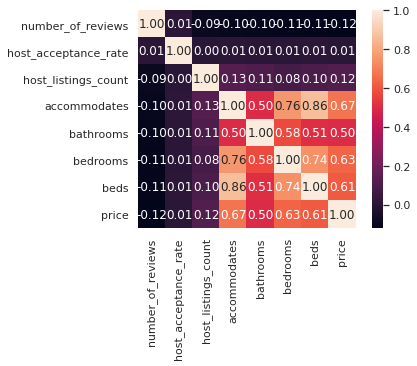

In [ ]:
# heatmap
corrs = np.corrcoef(df3[cols].values.T)
sns.set(font_scale=1)
hm=sns.heatmap(corrs, cbar = True, annot=True, square = True, fmt = '.2f',
              yticklabels = cols, xticklabels = cols)